In [4]:
import pandas as pd
import matplotlib.pyplot as plot

In [5]:
data = pd.read_csv('backtest_data.csv')

Trade 1, Gain/Loss: -85.77405857740632
Trade 3, Gain/Loss: -94.7359367735935
Trade 5, Gain/Loss: 101.29987712305956
Trade 7, Gain/Loss: -97.63939448858582
Trade 9, Gain/Loss: -76.62872579291616
Trade 11, Gain/Loss: -88.11097072307166
Trade 19, Gain/Loss: -94.62835494381216
Trade 21, Gain/Loss: -95.52789582449077
Trade 23, Gain/Loss: -87.312047853884
Trade 25, Gain/Loss: 98.77846348069579
Trade 29, Gain/Loss: -83.87733065912835
Trade 35, Gain/Loss: 96.18042629611409
Trade 37, Gain/Loss: 97.67389936709151
Trade 39, Gain/Loss: 96.4097975785262
Trade 41, Gain/Loss: 97.91391528080385
Trade 43, Gain/Loss: -93.1305167658229
Trade 45, Gain/Loss: 100.22421633321937
Trade 49, Gain/Loss: -78.36840320833835
Trade 51, Gain/Loss: 104.39551154122819
Trade 53, Gain/Loss: 99.14101903205847
Trade 55, Gain/Loss: 99.96577283866463
Trade 57, Gain/Loss: 115.72966940168044
Trade 59, Gain/Loss: 102.66712695064598
Trade 63, Gain/Loss: -82.64182594112572
Trade 67, Gain/Loss: -77.72628241404891
Trade 69, Gain/Lo

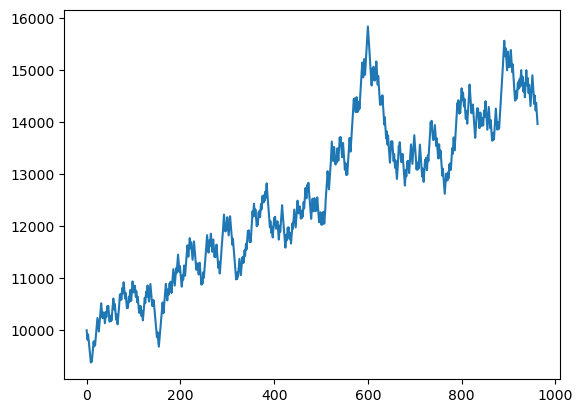

In [10]:
balance = 10000
balance_points = [10000]

for index, row in data.iterrows():
    stake = balance / 100

    if row['call_buy'] == True:
        buy_price = row['call_prices']
        sell_price = data.at[(index+1, 'call_prices')]
        p_l = sell_price - buy_price

        if p_l > 0:
            g_l = (p_l/buy_price + 1) * stake
            new_balance = balance + g_l
        elif p_l < 0:
            g_l = (p_l/buy_price + 1) * stake
            new_balance = balance - g_l
        else:
            continue

    
    elif row['put_buy'] == True:
        buy_price = row['put_prices']
        sell_price = data.at[(index+1, 'put_prices')]
        p_l = sell_price - buy_price

        if p_l > 0:
            g_l = (p_l/buy_price + 1) * stake
            new_balance = balance + g_l
        elif p_l < 0:
            g_l = (p_l/buy_price + 1) * stake
            new_balance = balance - g_l
        else:
            continue
        
    else:
        continue
    
    print(f'Trade {index+1}, Gain/Loss: {new_balance - balance}')
    balance = new_balance
    balance_points.append(balance)

plot.plot(balance_points)
percent_gain = round(((balance - 10000) / 10000) * 100, 2)
print(f'Gain: {percent_gain}%\nMax: {max(balance_points)}\nMin: {min(balance_points)}')